In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import utils
import datasets
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.layers import Conv2D, MaxPooling2D, Activation , Flatten, Dense
from keras.layers import Deconv3D,UpSampling3D, Activation
from keras.layers import LSTM, GRU

Using TensorFlow backend.


In [2]:
# some magic commands
%matplotlib inline
%load_ext autoreload

[load_dataset] loading ShapeNet
[construct_paths] for dir ShapeNet
[fetch_renders_from_disk]


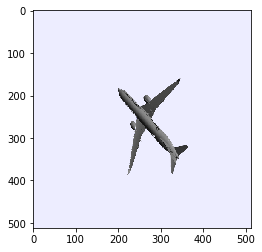

In [3]:
# get data
X=datasets.load_dataset("ShapeNet")
input_shape=X.shape[1:]

# display sample from data
plt.imshow(random.choice(X))

In [4]:
net = Sequential()
conv_filter_count = [96, 128, 256, 256, 256, 256]
deconv_filter_count = [128, 128, 128, 64, 32, 2]

In [5]:
# encoder network
print(X.shape)
net.add(Conv2D(filters=conv_filter_count[0],kernel_size= (7,7),input_shape=input_shape))
for i in range(1,6):
    net.add(Conv2D(filters=conv_filter_count[i],kernel_size= (3,3)))
    net.add(MaxPooling2D())
    net.add(Activation('relu')) 
    print(net.output.shape)

(5, 512, 512, 3)
(?, 252, 252, 128)
(?, 125, 125, 256)
(?, 61, 61, 256)
(?, 29, 29, 256)
(?, 13, 13, 256)


In [6]:
gru_grid= utils.grid3D(GRU(1024))

In [7]:
%autoreload
grid_slice=utils.get_neighbors(gru_grid,[4,4,4])

In [8]:
# lstm
net.add(Flatten())
print(net.output.get_shape())

(?, ?)


In [9]:
net.add(Dense(1024))
print(net.output.shape)
gru_layer=GRU(1024)

(?, 1024)


In [ ]:
# decoder network
for i in range(6):
    net.add(Deconv3D(filters=deconv_filter_count[i],kernel_size=(3,3,3)))
    net.add(UpSampling3D())
    net.add(Activation('relu'))
    print(net.output.shape)
    
print(net.output.shape())

In [ ]:
net.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
os.system("rm -rf ./logs/*")
tensor_board=TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
net.fit(X,np.random.rand(len(X),n_fc_filters[0]),epochs=1,callbacks=[tensor_board])